In [1]:
import pandas as pd
import numpy as np

In [20]:
# 엑셀 데이터 불러오기
sample_1 = pd.read_excel("sample_1.xlsx",
                        header = 1,
                        usecols = 'A:C',
                        skipfooter = 2,
                        #dtype = {'입국객수' : np.float64}
                        )
sample_1

,국적코드,성별,입국객수
0,A01,남성,106320
1,A01,여성,191436
2,A31,남성,319
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [21]:
sample_1.dtypes

국적코드    object
성별      object
입국객수     int64
dtype: object

In [13]:
fish = pd.read_csv("https://bit.ly/fish_csv",
                  encoding = 'uft-8') # encoding = 'euc-kr'

In [14]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [22]:
sample_1.head()

,국적코드,성별,입국객수
0,A01,남성,106320
1,A01,여성,191436
2,A31,남성,319
3,A31,여성,42
4,A18,남성,158912


In [23]:
sample_1.tail()

,국적코드,성별,입국객수
1,A01,여성,191436
2,A31,남성,319
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [24]:
# 데이터 정보 살펴보기
sample_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적코드    6 non-null      object
 1   성별      6 non-null      object
 2   입국객수    6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [25]:
print(type(sample_1))
print(sample_1.index)
print(sample_1.columns)
print(sample_1.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex(start=0, stop=6, step=1)
Index(['국적코드', '성별', '입국객수'], dtype='object')
국적코드    object
성별      object
입국객수     int64
dtype: object


In [27]:
# 데이터 기초통계량
sample_1.describe()

,입국객수
count,6.000000
mean,114995.333333
std,98105.752006
min,42.000000
25%,26819.250000
50%,132616.000000
75%,183305.000000
max,232943.000000


In [28]:
sample_1['성별'].value_counts()

여성    3
남성    3
Name: 성별, dtype: int64

In [29]:
# 데이터 선택(컬럼 기준)
sample_1['입국객수']

0    106320
1    191436
2       319
3        42
4    158912
5    232943
Name: 입국객수, dtype: int64

In [30]:
sample_1[['국적코드','성별']]

,국적코드,성별
0,A01,남성
1,A01,여성
2,A31,남성
3,A31,여성
4,A18,남성
5,A18,여성


In [31]:
sample_1['기준년월'] = '2019-11'
sample_1

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [34]:
# 데이터 선택(로우기준)
# 필터링
condition = (sample_1['성별'] == '남성')
condition

0     True
1    False
2     True
3    False
4     True
5    False
Name: 성별, dtype: bool

In [35]:
sample_1[condition]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
2,A31,남성,319,2019-11
4,A18,남성,158912,2019-11


In [36]:
sample_1[~condition]

,국적코드,성별,입국객수,기준년월
1,A01,여성,191436,2019-11
3,A31,여성,42,2019-11
5,A18,여성,232943,2019-11


In [37]:
condition = (sample_1['입국객수'] >= 150000)
sample_1[condition]

,국적코드,성별,입국객수,기준년월
1,A01,여성,191436,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [39]:
conditions = (sample_1['성별'] == '남성') & (sample_1['입국객수'] >= 150000)
sample_1[conditions]

,국적코드,성별,입국객수,기준년월
4,A18,남성,158912,2019-11


In [41]:
# 가독성 높게 표현
conditions = (sample_1['성별'] == '남성') \
                & (sample_1['입국객수'] >= 150000)
sample_1[conditions]

,국적코드,성별,입국객수,기준년월
4,A18,남성,158912,2019-11


In [46]:
conditions = (sample_1['국적코드'] == 'A01') | (sample_1['국적코드'] == 'A18')
sample_1[conditions]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [47]:
conditions = (sample_1['국적코드'].isin(['A01','A31']))
sample_1[conditions]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11


In [48]:
sample_1[conditions == False]

,국적코드,성별,입국객수,기준년월
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [50]:
sample_1.loc[1:3, ['성별','기준년월']]

,성별,기준년월
1,여성,2019-11
2,남성,2019-11
3,여성,2019-11


In [51]:
code_master = pd.read_excel('sample_codemaster.xlsx')
code_master

,국적코드,국적명
0,A01,일본
1,A02,대만
2,A03,홍콩
3,A18,중국
4,A19,이란
5,A22,우즈베키스탄
6,A23,카자흐스탄
7,A99,아시아 기타


In [52]:
sample_1_code = pd.merge(left = sample_1,
                        right = code_master,
                        how = 'left',
                        left_on = '국적코드',
                        right_on = '국적코드')
sample_1_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국


In [53]:
sample_1_code_inner = pd.merge(left = sample_1,
                        right = code_master,
                        how = 'inner',
                        left_on = '국적코드',
                        right_on = '국적코드')
sample_1_code_inner

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A18,남성,158912,2019-11,중국
3,A18,여성,232943,2019-11,중국


In [56]:
sample_2 = pd.read_excel("sample_2.xlsx",
                        header = 1,
                        skipfooter = 2,
                        usecols = 'A:C')

sample_2['기준년월'] = '2019-12'
sample_2_code = pd.merge(left = sample_2,
                         right = code_master,
                         how = 'left',
                         left_on = '국적코드',
                         right_on = '국적코드'
                        )
sample_2_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,92556,2019-12,일본
1,A01,여성,163737,2019-12,일본
2,A18,남성,155540,2019-12,중국
3,A18,여성,249023,2019-12,중국


In [58]:
sample = sample_1_code.append(sample_2_code, ignore_index = True)
sample

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국
6,A01,남성,92556,2019-12,일본
7,A01,여성,163737,2019-12,일본
8,A18,남성,155540,2019-12,중국
9,A18,여성,249023,2019-12,중국


In [59]:
sample_concat = pd.concat([sample_1_code, sample_2_code],
                          ignore_index = True,
                          axis = 0)
sample_concat
# 방식은 concat이 더 빠름.

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국
6,A01,남성,92556,2019-12,일본
7,A01,여성,163737,2019-12,일본
8,A18,남성,155540,2019-12,중국
9,A18,여성,249023,2019-12,중국


In [60]:
sample.to_excel('sample.xlsx')

In [62]:
sample.to_excel('sample_index_false.xlsx' , index=False, na_rep = 'NaN',
                sheet_name = 'mysheet')

In [64]:
with pd.ExcelWriter("multiple_sheet.xlsx") as writer:
    sample.to_excel(writer, sheet_name = 'my_sheet1')
    sample.to_excel(writer, sheet_name = 'my_sheet2',
                   index = False, na_rep = 'NaN')

In [65]:
sample

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국
6,A01,남성,92556,2019-12,일본
7,A01,여성,163737,2019-12,일본
8,A18,남성,155540,2019-12,중국
9,A18,여성,249023,2019-12,중국


In [69]:
# 피벗 테이블
sample_pivot = sample.pivot_table(values = '입국객수',
                                  index = '국적명',
                                  columns = '기준년월',
                                  aggfunc = 'mean')
sample_pivot

기준년월,2019-11,2019-12
국적명,,
일본,148878.0,128146.5
중국,195927.5,202281.5


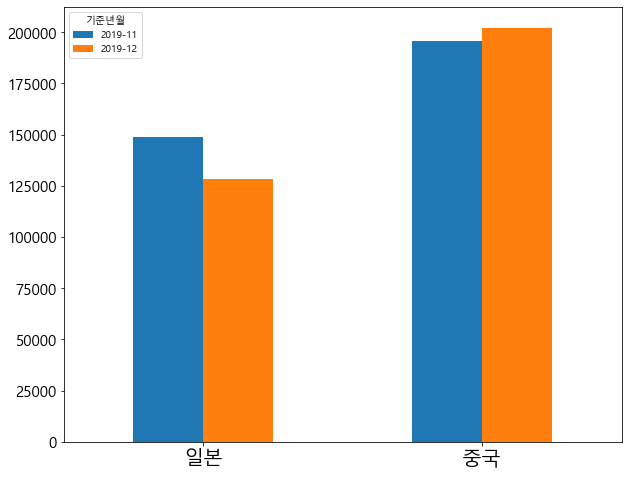

In [78]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'Malgun Gothic')
sample_pivot.plot(kind = 'bar', figsize = (10,8), rot = 0)
plt.xlabel("")
plt.xticks(size = 20)
plt.yticks(size = 15)
plt.show()

In [79]:
sample['입국객수'].mean()
# sample.groupby('성별').mean()

135082.8